In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# importing the style package 
from matplotlib import style 

plt.style.use('ggplot') 

xdata = [601.8663206, 1105.212296, 1780.026398, 3068.079385, 4400.114671, 5590.149968, 6616.194128, 7106.282582, 7608.937407, 7973.362155, 8268.671864, 8419.468312, 8645.662983, 8871.857654, 9462.477073, 10455.22035, 11083.53888, 12151.68038, 14903.71555, 17310.17552, 19886.2815, 22242.47599, 25918.13939, 28714.15685, 32056.81144]
ydata = [0.000411555, 0.000609418, 0.000890384, 0.001108033, 0.001226751, 0.001266324, 0.001286110, 0.001286110, 0.001286110, 0.001286110, 0.001286110, 0.001266324, 0.001286110, 0.001266324, 0.001266324, 0.001266324, 0.001266324, 0.001266324, 0.001226751, 0.001206965, 0.001187178, 0.001147606, 0.001108033, 0.001068461, 0.001009102]
sigma_y = []
sigma_x = []

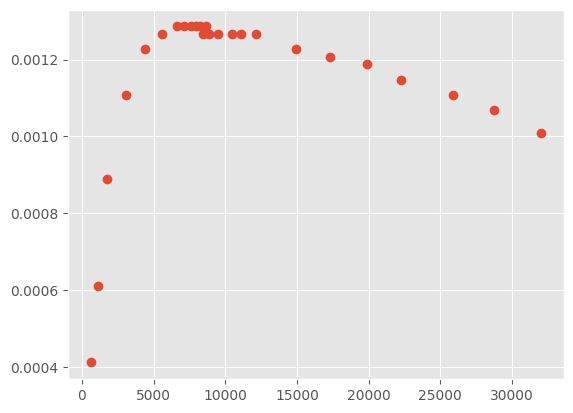

In [2]:
#Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')

The value of R is 937.22344 with standard error of 2.59233.
The value of L is 0.02431 with standard error of 0.00048.
The value of C is 5.482602917612705e-07 with standard error of 8.97958278735248e-09.


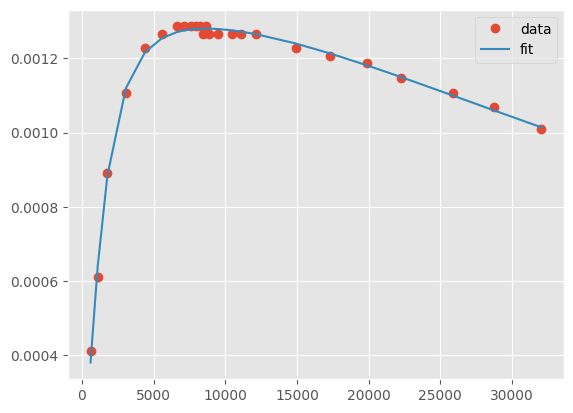

In [3]:
def corrente(x, R, L, C):
    y = 1.2/(R**2 + (x*L - 1/(x*C))**2)**(1/2)
    return y

guess = [47, 0.0299, 0.00000047]

parameters, covariance = curve_fit(corrente, xdata, ydata, p0=guess)

fit_R = parameters[0]
fit_L = parameters[1]
fit_C = parameters[2]
SE = np.sqrt(np.diag(covariance))
SE_R = SE[0]
SE_L = SE[1]
SE_C = SE[2]

print(F'The value of R is {fit_R:.5f} with standard error of {SE_R:.5f}.')
print(F'The value of L is {fit_L:.5f} with standard error of {SE_L:.5f}.')
print(F'The value of C is {fit_C} with standard error of {SE_C}.')

# Calculate chisquare value and degrees of freedom
# chi2 = np.sum((fit_y - ydata)**2 / sigma_y**2)
# ndf = len(xdata) - len(parameters) - 1

fit_y = corrente(xdata, fit_R, fit_L, fit_C)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()